<a href="https://colab.research.google.com/github/JulinkG/Modelos_supervisados_y_nosupervisados/blob/main/ModeloS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comentarios generales

* Comenta tu código


In [8]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [132]:
# Read data
dtt = pd.read_parquet('/content/drive/MyDrive/train.parquet')

In [133]:
dtt.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [134]:
# Create a categorical value for different levels of pricing
category_prices = []

for i in dtt['price']:
  if i <= 999:
    category_prices.append('low')
  elif 1999 >= i >=1000:
    category_prices.append('medium')
  else:
    category_prices.append('high')


In [135]:
dtt['category_prices'] = category_prices

In [136]:
dtt.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_prices
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,medium
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,medium
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,low




get_dummies = pd.get_dummies() -> DataFrame mxn n renglones corresponden a tus n renglones del dataframe original

pd.concat(dtt, get_dummies)

$y = mx+b$


In [137]:
#Primer paso: convertimos todas las variables categoricas a numéricas, quitando la columna precios y añadiendo variables dummies
dtt_fin=dtt[['region','type','sqfeet','beds','baths','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','category_prices']]
dtt_fin['category_prices']=dtt_fin['category_prices'].replace(['low', 'medium', 'high'], [1,0,0])

<ipython-input-137-d4d0df742d60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtt_fin['category_prices']=dtt_fin['category_prices'].replace(['low', 'medium', 'high'], [1,0,0])


In [138]:
pd_dummies=pd.get_dummies(dtt_fin,columns=['region','type'])

In [139]:
#Extraemos nuestra columna a predecir
y=pd_dummies['category_prices']

In [140]:
#La eliminamos del dataset
pd_final=pd_dummies.drop(['category_prices'], axis=1)

In [141]:
pd_final.head(5)

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,region_SF bay area,...,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse
0,1200,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,694,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,900,2,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1469,3,2.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,700,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
#Una vez obtenido el data frame final, lo separamos en test y train
X_train, X_test, y_train, y_test = train_test_split(pd_final,y,test_size=0.2,random_state=8,shuffle=True)

In [119]:
lr = LogisticRegression()

In [152]:
#Realizamos el fit de nuestro modelo de regresión logística
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
#Utilizamos el modelo en un predict
y_predict=lr.predict(X_test)

In [154]:
y_predict

array([0, 1, 1, ..., 0, 1, 1])

In [155]:
confusion_matrix=sklearn.metrics.confusion_matrix(y_test, y_predict,)

<function matplotlib.pyplot.show(*args, **kw)>

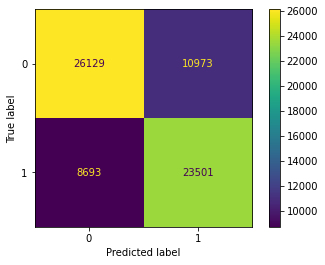

In [156]:
disp=sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix)
disp.plot()
plt.show

In [157]:
accuracy= (26129+23501)/(26129+10973+8693+23501)
accuracy

0.7162029554375433

In [159]:
recall = 23501/(23501+10973)
recall

0.6817021523466961